In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load and show TMNIST Dataset from CSV


In [2]:
data = pd.read_csv("../../data/TMNIST_Data.csv", header=0)
data

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split in Labels and Data and normalize Data


In [3]:
# Convert pixel values to image format and normalize
X = data.drop(columns={"names", "labels"}, axis=1)
X = X.values.reshape(-1, 28, 28, 1) / 255.0  # normalize and reshape to square
# X = 1 - X  # invert colors
y = data["labels"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

## Show sample data


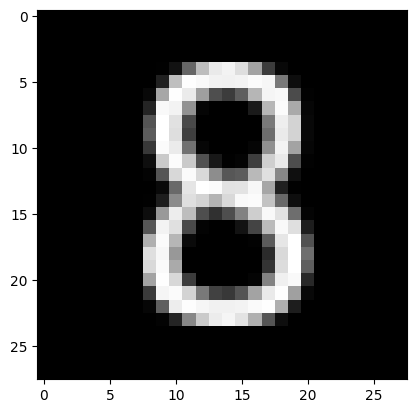

8

In [4]:
sample = 1

sample_image = X[sample]

# Plot the image
plt.imshow(sample_image, cmap="gray")
plt.show()
y[sample]

## Set rotation steps


In [5]:
# stepsize between whole numbers
step = 0.25
count = 0

## Function to return rotated images with labels


In [6]:
# Create a function to swap image halves and assign label depending on stepsize
def create_swapped_image(image1, label1, image2, label2, step=0.5):
    new_images = []
    new_labels = []

    size = image1.shape[0]
    num_of_cuts = int(1 / step)
    count = num_of_cuts
    cut_size = int(size * step)
    cur_label = label1

    for i in range(1, num_of_cuts + 1):
        cut = cut_size * i
        new_image = np.vstack((image1[cut:, :], image2[:cut, :]))
        new_label = cur_label + step
        new_images.append(new_image)
        new_labels.append(new_label)
        cur_label += step

    return new_images, new_labels

## Create new data by iterating over exisiting


In [7]:
# Create transformed dataset
transformed_images = []
transformed_labels = []

for label1, label2 in zip(range(0, 9), range(1, 10)):
    label1_images = X[y == label1]
    label2_images = X[y == label2]

    for image1, image2 in zip(label1_images, label2_images):
        new_images, new_labels = create_swapped_image(
            image2, label1, image1, label2, step
        )

        # print(np.shape(new_images))
        for i in range(0, np.shape(new_images)[0]):
            transformed_images.append(new_images[i])
            transformed_labels.append(new_labels[i])


transformed_images = np.array(transformed_images)
transformed_labels = np.array(transformed_labels)
print(transformed_images.shape)

(107640, 28, 28, 1)


## show sample images of rotated data


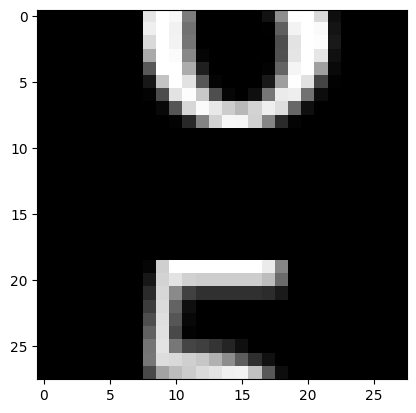

5.5

In [8]:
sample = 70053

sample_image = transformed_images[sample]

# Plot the image
plt.imshow(sample_image, cmap="gray")
plt.show()

transformed_labels[sample]

## Save Data as CSV


In [31]:
flattended_images = transformed_images.reshape(transformed_images.shape[0], -1)

data = np.hstack((transformed_labels.reshape(-1, 1), flattended_images))
column_names = ["label"] + [i for i in range(flattended_images[0].shape[0])]

df = pd.DataFrame(data, columns=column_names)

df.to_csv("../../data/rotated_data.csv", index=False)